## Exploratory Data Analisys
### Derecha Diario

### Load tokens

In [1]:
import pandas as pd

In [2]:
token_df = pd.read_pickle('tokens/topic_tokens_der.pkl')

In [3]:
token_df

,topics,abajo,abandonara,abandone,abastecimiento,abatida,abierta,abierto,aboga,abraza,...,woyecheszen,xx,yaguarete,york,ypf,yuanes,zamora,zona,zonaprop,zonas
doc1,inflation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc2,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
doc3,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc4,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0
doc5,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc6,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc7,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc8,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc9,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc10,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Get docs by topics

### Count words in/between doc(s)

#### Inflation topics

In [4]:
inflation = token_df[token_df.topics == 'inflation'].drop('topics', axis=1)

In [5]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [6]:
top_words = count_words(inflation)

In [7]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc1
[('precios', 8), ('inflacion', 8), ('monetaria', 7), ('dinero', 5), ('argentina', 5), ('mas', 4), ('aumento', 4), ('elaboracion', 3), ('variacion', 3), ('economia', 3), ('base', 3), ('alta', 3), ('demanda', 3), ('convertibilidad', 3), ('decada', 2), ('nivel', 2), ('mayores', 2), ('poder', 2), ('politica', 2), ('pais', 2), ('diferencias', 2), ('pudo', 2), ('cualquier', 2), ('tiempo', 2), ('adquisitivo', 2), ('controles', 2), ('tambien', 2), ('partir', 2), ('exitosamente', 2), ('perdida', 2)]
-------------
doc2
[('mas', 7), ('inflacion', 5), ('aumentos', 5), ('promedio', 4), ('octubre', 4), ('aumentaron', 4), ('dato', 3), ('encima', 3), ('general', 3), ('precios', 3), ('registraron', 3), ('fuerte', 3), ('mes', 3), ('rubro', 2), ('caracter', 2), ('cifras', 2), ('vestir', 2), ('cerro', 2), ('region', 2), ('comportamiento', 2), ('mientras', 2), ('servicios', 2), ('segunda', 2), ('septiembre', 2), ('pais', 2), ('estacional', 2), ('bienes', 2), ('bebidas', 2), ('anualizada', 2), ('alimen

### Plot

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [9]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


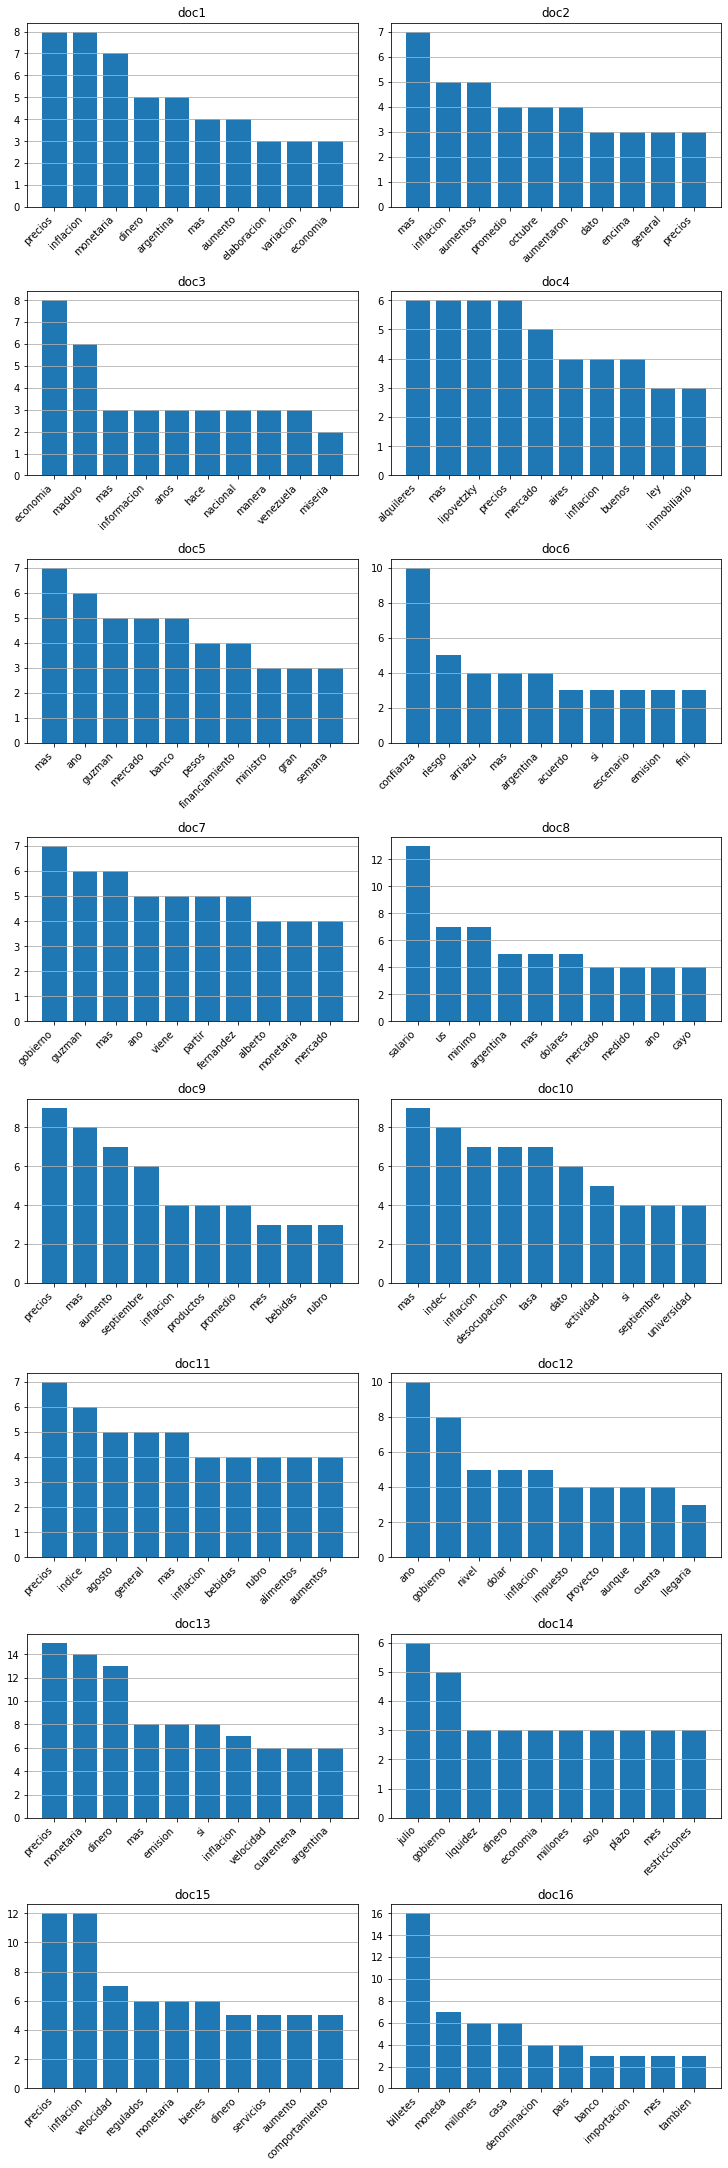

In [10]:
fig, axes = plt.subplots(nrows=8, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [11]:
from collections import Counter

In [12]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [13]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('mas', 24)
('inflacion', 21)
('gobierno', 15)
('precios', 14)
('economia', 14)
('ano', 12)
('pais', 11)
('monetaria', 10)
('aumento', 10)
('mes', 10)
('argentina', 9)
('si', 9)
('nivel', 8)
('dinero', 7)
('tambien', 7)
('mercado', 7)
('politica', 6)
('general', 6)
('banco', 6)
('emision', 6)
('medidas', 6)
('demanda', 5)
('promedio', 5)
('bienes', 5)
('cada', 5)
('central', 5)
('tipo', 5)
('deficit', 5)
('cuarentena', 5)
('vez', 5)
('aumentos', 4)
('servicios', 4)
('septiembre', 4)
('pesos', 4)
('viene', 4)
('economica', 4)
('fernandez', 4)
('alberto', 4)
('millones', 4)
('indice', 4)
('pandemia', 4)
('aislamiento', 4)
('aun', 4)
('base', 3)
('tiempo', 3)
('partir', 3)
('rubro', 3)
('region', 3)
('comportamiento', 3)
('bebidas', 3)


#### Currency exchange topics

In [14]:
exchange = token_df[token_df.topics == 'exchange'].drop('topics', axis=1)

In [15]:
top_words = count_words(exchange)

In [16]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc30
[('inflacion', 6), ('mobius', 5), ('hoy', 4), ('argentina', 3), ('dia', 3), ('hanke', 3), ('anual', 3), ('ultimos', 2), ('ejecutivo', 2), ('mundo', 2), ('indole', 2), ('problema', 2), ('hiperinflacion', 2), ('ano', 2), ('mark', 2), ('sino', 2), ('indec', 2), ('empresas', 2), ('estimacion', 2), ('nivel', 2), ('dolarizacion', 2), ('steve', 2), ('deficit', 2), ('actual', 2), ('publicas', 2), ('recomendaciones', 2), ('describio', 2), ('metodologia', 2), ('internacional', 2), ('partes', 1)]
-------------
doc31
[('transacciones', 5), ('inflacion', 4), ('poder', 3), ('credito', 3), ('mas', 3), ('hiperinflacion', 3), ('partir', 3), ('dolar', 3), ('local', 3), ('parte', 3), ('moneda', 3), ('venezolano', 3), ('venezolana', 3), ('region', 2), ('tipo', 2), ('parcial', 2), ('formalizacion', 2), ('pesar', 2), ('caso', 2), ('monetaria', 2), ('sistema', 2), ('operaciones', 2), ('solamente', 2), ('economia', 2), ('venezuela', 2), ('erosion', 2), ('economica', 2), ('dolarizacion', 2), ('legalizaci

### Plot

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [18]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


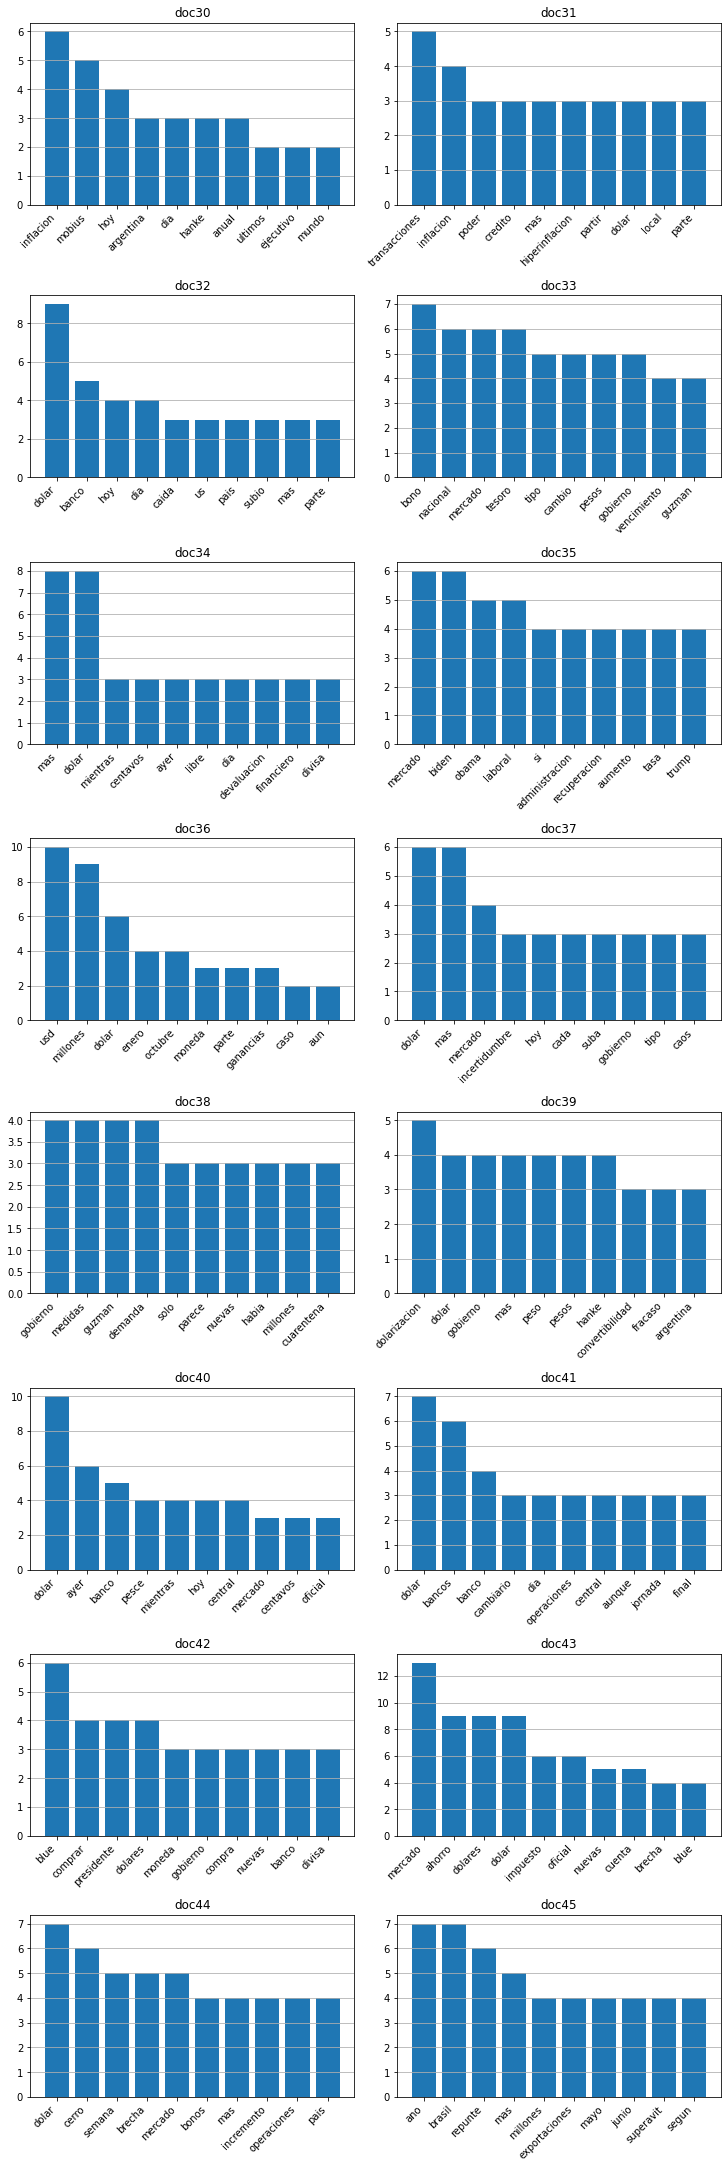

In [19]:
fig, axes = plt.subplots(nrows=8, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [20]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [21]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('dolar', 16)
('mas', 14)
('gobierno', 14)
('tipo', 13)
('mercado', 13)
('pais', 9)
('cambio', 9)
('medidas', 9)
('banco', 8)
('millones', 8)
('pesos', 8)
('oficial', 8)
('guzman', 8)
('central', 7)
('hoy', 6)
('economia', 6)
('dolares', 6)
('dia', 5)
('parte', 5)
('moneda', 5)
('impuesto', 5)
('blue', 5)
('nuevas', 5)
('bcra', 5)
('argentina', 4)
('monetaria', 4)
('operaciones', 4)
('us', 4)
('libre', 4)
('ayer', 4)
('gran', 4)
('mientras', 4)
('habia', 4)
('vez', 4)
('bancos', 4)
('ahorro', 4)
('inflacion', 3)
('problema', 3)
('ano', 3)
('nivel', 3)
('dolarizacion', 3)
('credito', 3)
('local', 3)
('pesar', 3)
('caso', 3)
('caida', 3)
('ganancias', 3)
('bonos', 3)
('expectativas', 3)
('enorme', 3)


There are not a significant number of word repetions among documents. Therefore, the only ones to be erase would be those who habe no contextual meaning.

In [22]:
more_stop_words = ['dia', 'mes','dias', 'hoy', 'mas','ano','habia','aunque','si']

In [23]:
inflation.drop(more_stop_words, axis=1, inplace=True)

In [24]:
exchange.drop(more_stop_words, axis=1, inplace=True)

Tokens update

In [25]:
tokens_new = token_df.drop(more_stop_words, axis=1)

In [26]:
tokens_new.to_pickle('tokens/topic_tokens_der_new.pkl')

### Visual Representation
#### Words Frequency

In [27]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pickle

In [28]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [29]:
df_inflation = data.loc[data.topics == 'inflation', 'body'].values
df_exchange = data.loc[data.topics == 'exchange', 'body'].values

In [30]:
stopwords_sp = stopwords.words('spanish')
stopwords_sp = stopwords_sp + more_stop_words

In [31]:
plt.rcParams['figure.figsize'] = [16 , 30]
cloud = WordCloud(stopwords=stopwords_sp, background_color='white')

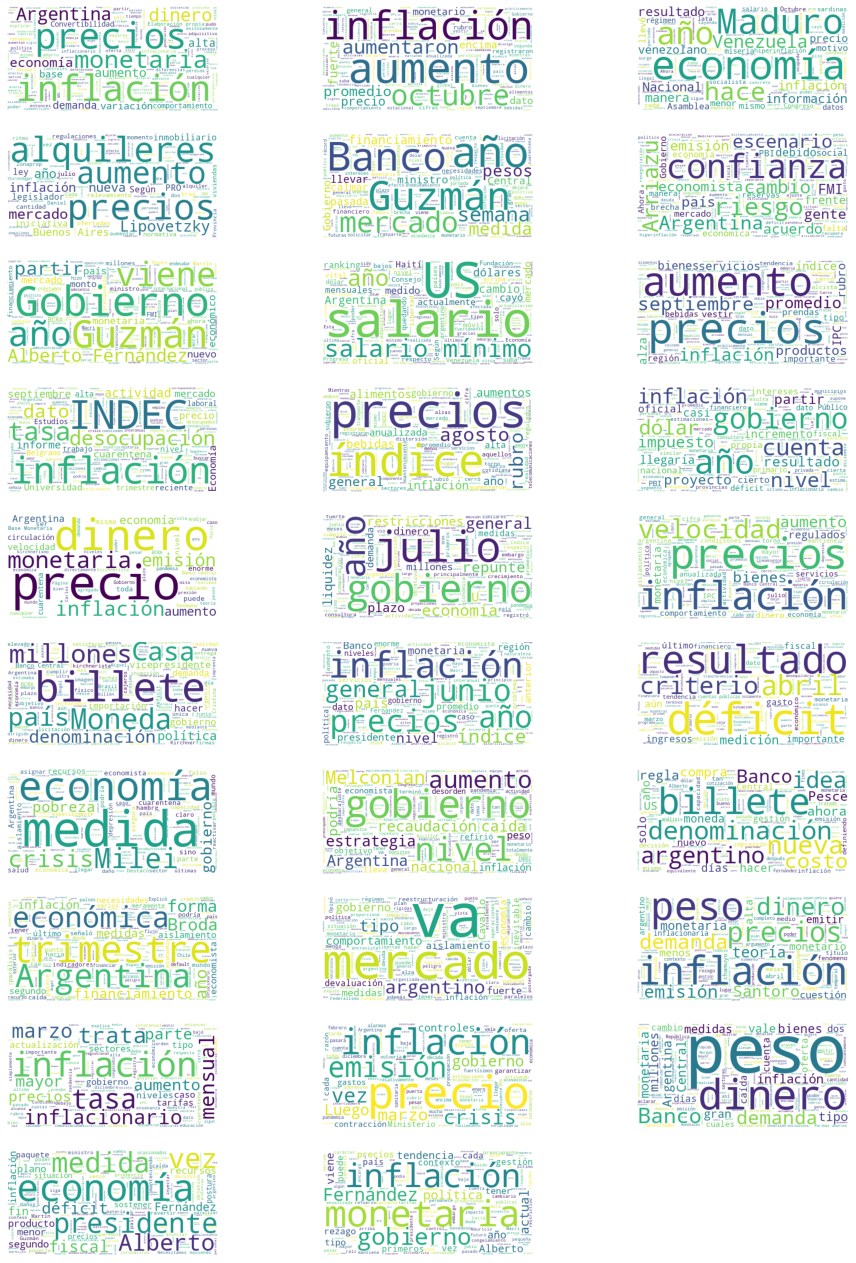

In [32]:
for index, doc in enumerate(df_inflation):
    cloud.generate(doc)
    plt.subplot(13, 3, index + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()    

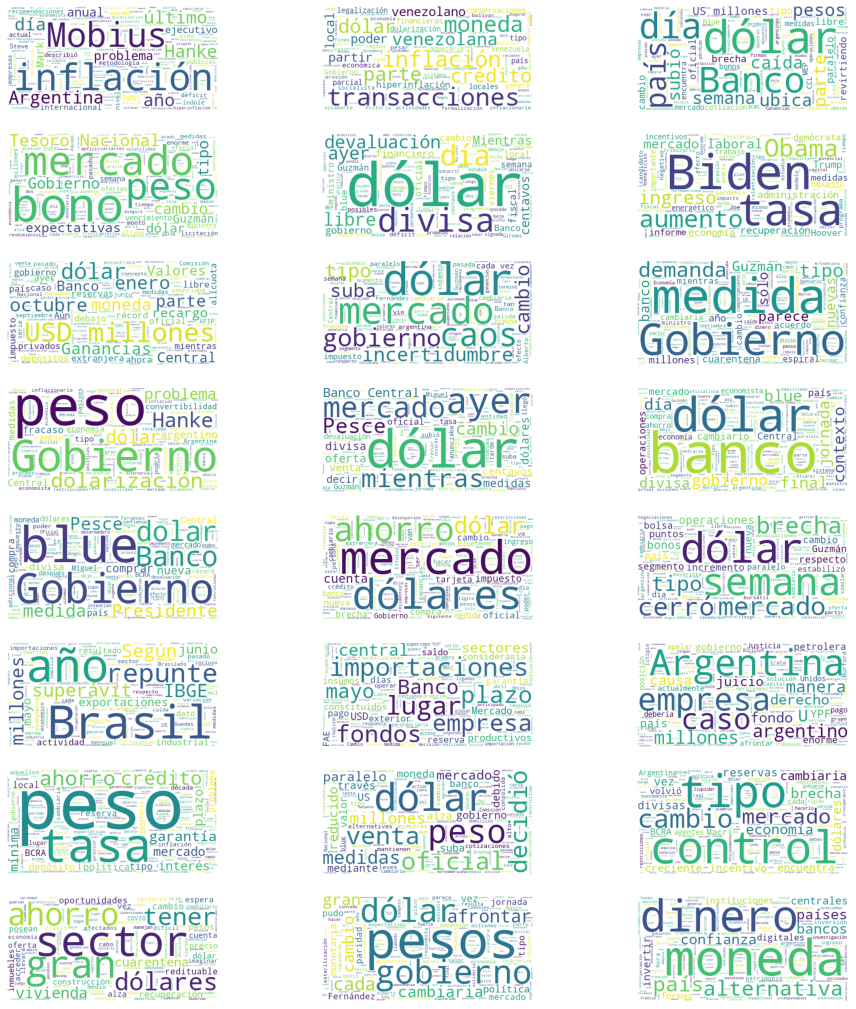

In [33]:
for index, doc in enumerate(df_exchange):
    cloud.generate(doc)
    plt.subplot(13, 3, index + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()    